<a href="https://colab.research.google.com/github/HanaaBaite/Exercices-Jedha/blob/master/Projet_Conversion_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv("conversion_data.csv")

In [4]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
dataset.size

1897200

In [6]:
# Valeurs manquantes 
dataset.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [7]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [8]:
# Régression linéaire sur toutes les variables : Etude de la corrélation positive ou négative entre celle-ci
dataset.corr(method='spearman')

,age,new_user,total_pages_visited,converted
age,1.000000,0.012094,-0.026102,-0.091756
new_user,0.012094,1.000000,-0.048372,-0.152374
total_pages_visited,-0.026102,-0.048372,1.000000,0.293424
converted,-0.091756,-0.152374,0.293424,1.000000


In [9]:
# Régression linéaire sur toutes les variables avec code "chaleur"
from matplotlib import pyplot
dataset.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,age,new_user,total_pages_visited,converted
age,1.0,0.012,-0.026,-0.092
new_user,0.012,1.0,-0.048,-0.15
total_pages_visited,-0.026,-0.048,1.0,0.29
converted,-0.092,-0.15,0.29,1.0


In [10]:
dataset[dataset["age"] >= 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [11]:
dataset.drop(90928,0,inplace=True)

In [12]:
dataset.drop(295581,0,inplace=True)

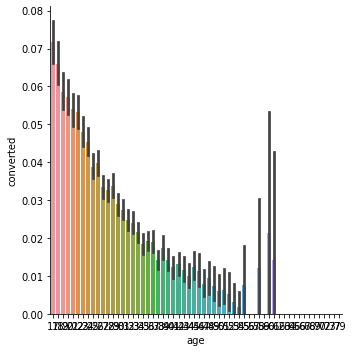

In [13]:
# Visualisation exploratoire 
sns.catplot(x="age", y="converted", data=dataset, kind="bar")

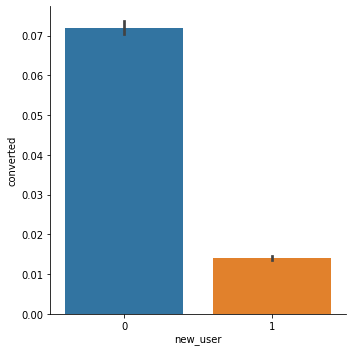

In [40]:
# Visualisation exploratoire 
sns.catplot(x="new_user", y="converted", data=dataset, kind="bar")

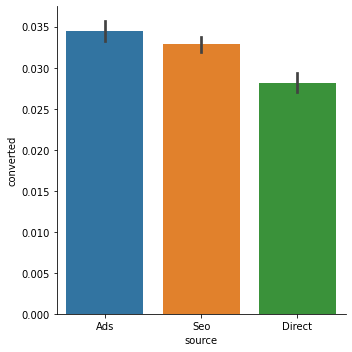

In [41]:
# Visualisation exploratoire 
sns.catplot(x="source", y="converted", data=dataset, kind="bar")

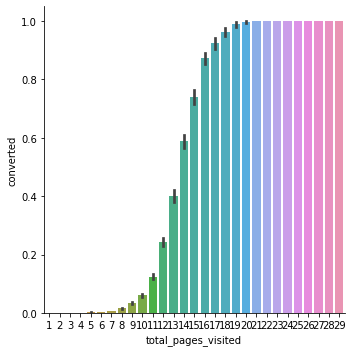

In [42]:
# Visualisation exploratoire 
sns.catplot(x="total_pages_visited", y="converted", data=dataset, kind="bar")

In [43]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [ ]:
# Régresion log entre l'âge et avoir une conversion
sns.lmplot(x="age", y="converted", data=dataset, logistic=True)

In [ ]:
# Séparation des X & y 
# X = dataset.iloc[:, :-1]
# y = dataset.iloc[:, -1]
X = dataset
y = dataset["Converted"]

In [ ]:
X

In [ ]:
Y

In [ ]:
# Dummyfication 
X = pd.get_dummies(X, drop_first=True)
X.head()

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train

In [ ]:
# Application du modèle 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, y_train)))

print("Test score : {}".format(classifier.score(X_test, y_test)))

In [ ]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier.predict(X_test))
cm

In [ ]:
# Visualisation via Seaborn 
sns.heatmap(cm, annot=True, fmt=".2f")

In [ ]:
classifier.coef_.squeeze()

In [ ]:
# Feature importance 
pd.DataFrame({"Features": ['age', 'new_user', 'total_pages_visited'],
              "Values": classifier.coef_.squeeze()})

In [ ]:
dataset.head()